# BASICS 01 - Load events with Tonic and make Time Surfaces

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../hots/
import tonic
from timesurface import timesurface
from utils import get_loader, get_dataset_info
import matplotlib.pyplot as plt

/home/antoine/homhots/hotsline/hots


number of samples in the trainset: 48
number of samples in the testset: 48
----------------------------------------
number of samples in each class for the trainset: [12. 12. 12. 12.]
number of samples in each class for the testset: [12. 12. 12. 12.]
----------------------------------------


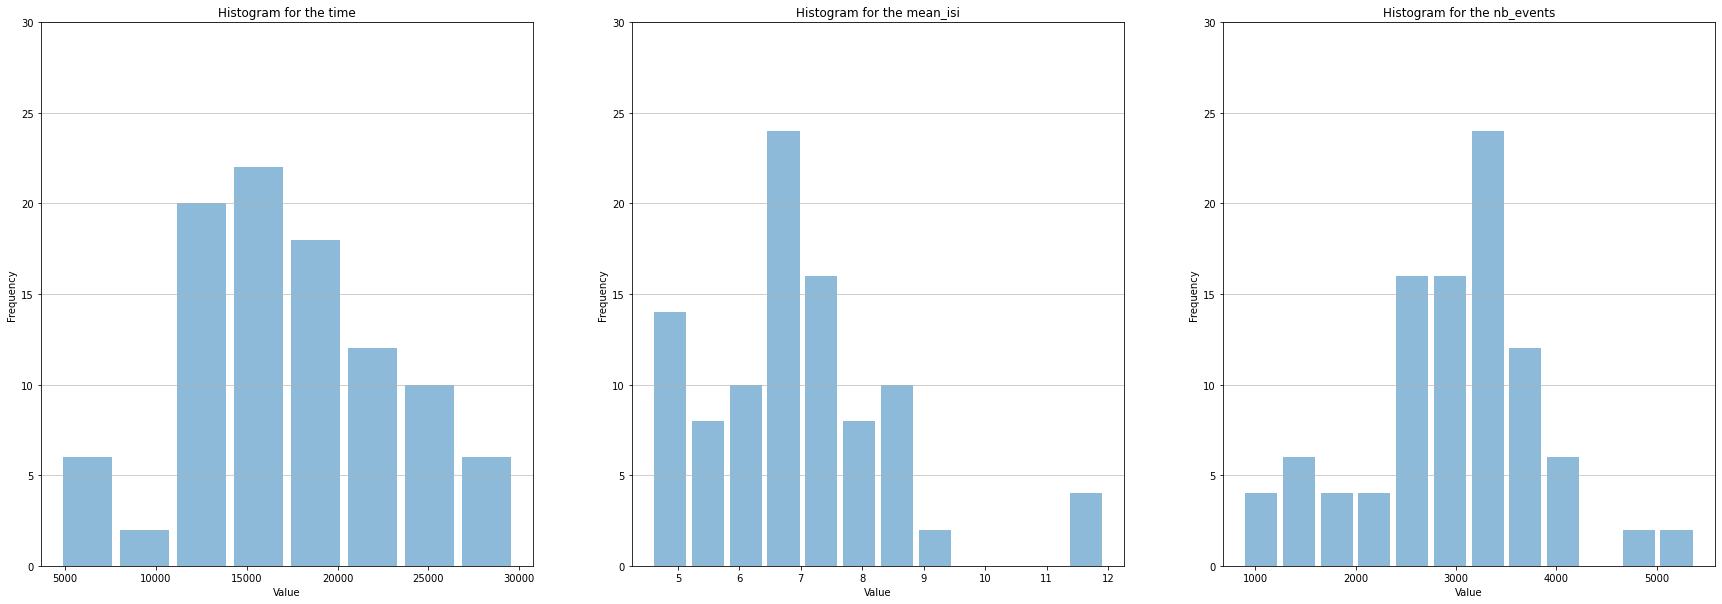

In [3]:
transform = tonic.transforms.NumpyAsType(int)
dataset = tonic.datasets.POKERDVS(save_to='../../Data/', train=True,transform=transform)
loader = get_loader(dataset)
get_dataset_info(dataset,dataset, properties = ['time', 'mean_isi', 'nb_events']);

In [4]:
events, target = next(iter(loader))

In [5]:
TSs, ind_filtered = timesurface(events.squeeze(), dataset.sensor_size, dataset.ordering, tau = 7e2,  surface_dimensions=(9,9))

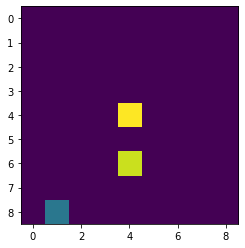

In [6]:
event_indice = 200
ts_off = plt.imshow(TSs[event_indice][0,:,:])

## Entropy of the time surfaces as a function of tau
- NMNIST: tau = 12 ms
- POKER DVS: tau = 5 ms

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [02:40<00:00,  3.35s/it]


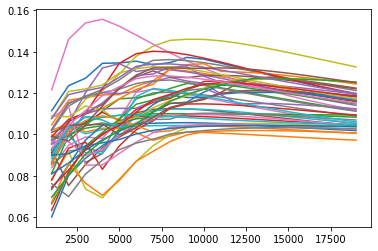

In [12]:
import numpy as np
from tqdm import tqdm
import torch

entropy = []

loader = get_loader(dataset)
for events, target in tqdm(loader):
    tauz = np.arange(1,20)*1e3
    for tau in tauz:
        TSs, indices = timesurface(events.squeeze(), dataset.sensor_size, dataset.ordering, tau = tau,  surface_dimensions=(5,5))
        entropy.append(-(TSs*torch.log(TSs)).mean(dim=(1,2,3)).nanmean().detach().cpu())
    plt.plot(tauz, entropy[-len(tauz):])

Optimal tau: 5.0 ms


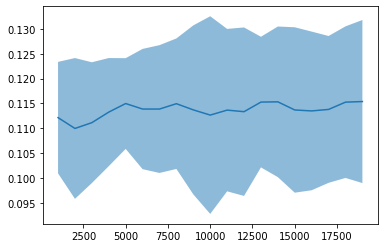

In [36]:
mean_ent = []
std_ent = []
for ind, tau in enumerate(tauz):
    entropy_tau = entropy[ind::48]
    mean_ent.append(np.nanmean(entropy_tau))
    std_ent.append(np.nanstd(entropy_tau))
    
plt.plot(tauz,mean_ent)
plt.fill_between(tauz, np.array(mean_ent)-np.array(std_ent), np.array(mean_ent)+np.array(std_ent), alpha = 0.5)

index = np.argmax(np.array(mean_ent)/np.array(std_ent))
print(f'Optimal tau: {tauz[index]*1e-3} ms')

4
5000.0


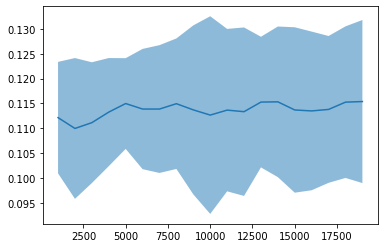

In [26]:
plt.plot(tauz,mean_ent)
plt.fill_between(tauz, np.array(mean_ent)-np.array(std_ent), np.array(mean_ent)+np.array(std_ent), alpha = 0.5)